<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

# Serie de tiempo: Consumo

Se analizará a continuación una serie de tiempo correspondiente al consumo de algunas líneas urbanas de Rosario. El consumo se calcula en litros de combustible consumidos cada 100 kilómetros realizados [lts/100km].
Esta serie se complementa a las otras series analizadas: total de pasajeros que marcaron pasaje y total de kilómetros realizados por las unidades.
Se cuentan con datos diarios y el objetivo del análisis es evaluar la relación entre estas 3 importantes variables para la operación del servicio. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta


import warnings
warnings.filterwarnings('ignore')

#!pip install statsmodels


####  Leemos los datos a trabajar


In [4]:
url= 'https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Consumo_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_consumo=raw_csv_data.copy()

#### Breve resumen del dataset


In [5]:
print(df_consumo.columns)

df_consumo.Consumo.mean()

Index(['Fecha', 'Consumo'], dtype='object')


45.95726011089604

In [6]:
df_consumo.head(10)

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902
5,2023-05-18,46.485462
6,2023-05-17,46.089042
7,2023-05-16,45.802815
8,2023-05-15,45.871810
9,2023-05-13,44.398464


In [7]:
df_consumo.Fecha.describe()

count            757
unique           757
top       2023-06-05
freq               1
Name: Fecha, dtype: object

In [8]:
df_consumo.dtypes

Fecha       object
Consumo    float64
dtype: object

Adaptamos el dataset para trabajarlo segun sus series temporales

In [9]:
df_consumo.Fecha = pd.to_datetime(df_consumo.Fecha, dayfirst = True)

In [10]:
df_consumo.head()

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902


In [11]:
df_consumo.Fecha.describe()

count                     757
unique                    757
top       2023-06-05 00:00:00
freq                        1
first     2021-10-01 00:00:00
last      2023-10-31 00:00:00
Name: Fecha, dtype: object

In [12]:
df_consumo.dtypes

Fecha      datetime64[ns]
Consumo           float64
dtype: object

In [13]:
from skimpy import skim

In [14]:
skim(df_consumo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 757    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Consumo            │    0 │       0 │      46 │    3.8 │    0 │    44 │    46 │    48 │      56 │      ▇▇  │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Preparación de los datos

Se puede observar que hay al menos 1 día con consumo igual a 0. Se analizará esto.

In [15]:
df_consumo.iloc[df_consumo.Consumo.argmin()]

Fecha      2022-05-17 00:00:00
Consumo                    0.0
Name: 756, dtype: object

El día 2022-05-17 hubo paro de transporte y no hubo carga de combustible, es por este motivo qe retirar del dataset ya que no representa un valor real de consumo. Luego, los datos faltantes en la serie se imputarán ya que estos modelos no permiten valores nan.

In [16]:
df_consumo = df_consumo.loc[df_consumo.Consumo>0]

Seteamos como index del dataset segun el dia

In [17]:
df_consumo.set_index("Fecha", inplace=True)
df_consumo.head()

,Consumo
Fecha,
2023-06-05,46.488384
2023-05-23,46.161079
2023-05-22,45.449817
2023-05-20,43.725000
2023-05-19,44.884902


Adaptamos el datset segun una frecuencia diaria de la serie temporal.

In [18]:
df_consumo=df_consumo.asfreq('d')
df_consumo.head()

,Consumo
Fecha,
2021-10-01,45.201497
2021-10-02,39.899719
2021-10-03,39.705724
2021-10-04,45.777167
2021-10-05,46.147136


In [19]:
df_consumo.isna()

,Consumo
Fecha,
2021-10-01,False
2021-10-02,False
2021-10-03,False
2021-10-04,False
2021-10-05,False
...,...
2023-10-27,False
2023-10-28,False
2023-10-29,False


In [20]:
df_consumo.isna().sum()

Consumo    5
dtype: int64

Como se puede ver, hay 5 días en los que no hay registro de consumo debido a que no hubo carga de combustible. Se analizará de qué días se trata.

In [21]:
sin_consumo = df_consumo[df_consumo.Consumo.isna()].reset_index().Fecha
print(sin_consumo)

0   2022-05-17
1   2022-10-12
2   2022-10-13
3   2023-06-13
4   2023-06-22
Name: Fecha, dtype: datetime64[ns]


Estos 5 días sin carga de combustible corresponden a días en donde hubo medidas gremiales y no hubo servicio de transporte. En el mes de junio 2022 se puede observar que hubo 2 días consecutivos de paros. 
Estos casos son imposibles de predecir para un modelo y se completarán con una media de los valores cercanos para no dañar el modelo.

In [22]:
#df_consumo.loc[sin_consumo[0], "Consumo"] = (df_consumo.loc[sin_consumo[0] + timedelta(days=1), "Consumo"] + df_consumo.loc[sin_consumo[0] + timedelta(days=-1), "Consumo"])/2
#df_consumo.loc[sin_consumo[1:3], "Consumo"] = (df_consumo.loc[sin_consumo[1] + timedelta(days=-1), "Consumo"] + df_consumo.loc[sin_consumo[2] + timedelta(days=1), "Consumo"])/2
#df_consumo.loc[sin_consumo[3], "Consumo"] = (df_consumo.loc[sin_consumo[3] + timedelta(days=1), "Consumo"] + df_consumo.loc[sin_consumo[3] + timedelta(days=-1), "Consumo"])/2
#df_consumo.loc[sin_consumo[4], "Consumo"] = (df_consumo.loc[sin_consumo[4] + timedelta(days=1), "Consumo"] + df_consumo.loc[sin_consumo[4] + timedelta(days=-1), "Consumo"])/2
#print(df_consumo.loc[sin_consumo, "Consumo"])

Para imputar los valores ausentes de la serie se utilizará el promedio de los valores de consumo para ese día de la semana en la semana anterior y en la semana posterior.

In [23]:
for i in sin_consumo:
  df_consumo.loc[i, "Consumo"] = (df_consumo.loc[i + timedelta(days=-7), "Consumo"] + df_consumo.loc[i + timedelta(days=7), "Consumo"])/2

Estos son los valores imputados:

In [24]:
df_consumo.loc[sin_consumo,]

,Consumo
Fecha,
2022-05-17,44.193725
2022-10-12,46.886405
2022-10-13,48.158563
2023-06-13,43.781655
2023-06-22,46.095441


## Visualización de la serie

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

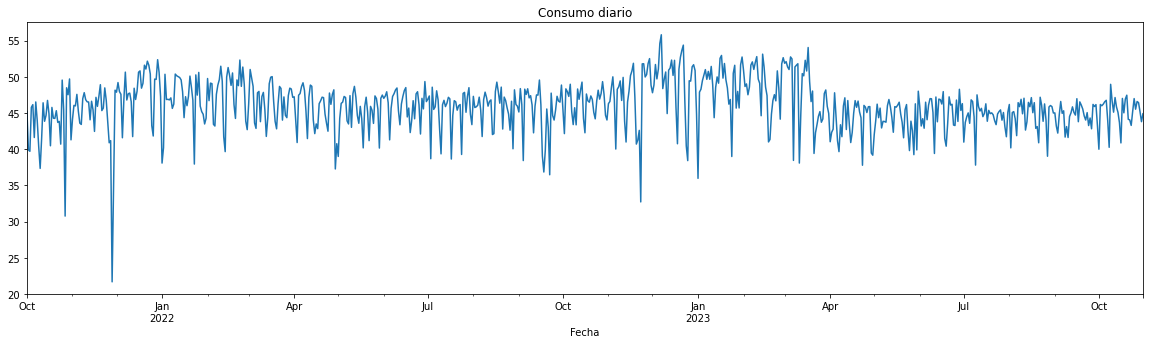

In [25]:
df_consumo.Consumo.plot(figsize=(20,5), title = "Consumo diario")
plt.show()

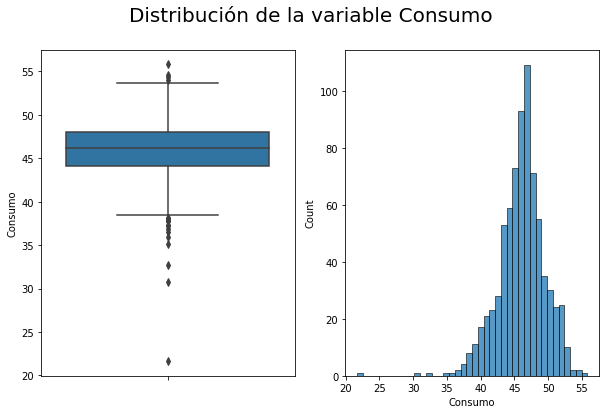

In [26]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable Consumo', fontsize = 20)


sns.histplot(data = df_consumo, x="Consumo", ax = axs[1]);
sns.boxplot(y = "Consumo", data = df_consumo, ax = axs[0]);


Como se puede ver en las gráficas la distribución de la variable consumo tiene asimetría izquierda y no presenta una distribución normal.

In [27]:
import scipy.stats
import pylab
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib import pyplot
from scipy.stats import jarque_bera, shapiro, boxcox, probplot

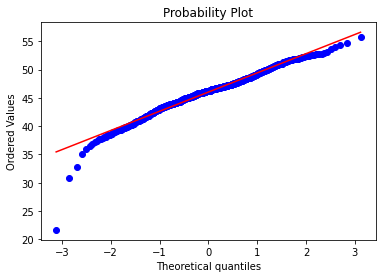

In [28]:
scipy.stats.probplot(df_consumo.Consumo, plot = plt, fit=True, dist='norm');

La variable consumo tiene una asimetría a la izquierda, habiendo días en donde el consumo fue muy bajo. En el QQ plot se puede ver como la cola de la izquierda es muy "pesada".

### Descomposición de la Serie Temporal

In [29]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

#### Descomposicion Aditiva

In [30]:
#df_consumo = df_consumo.asfreq('d')

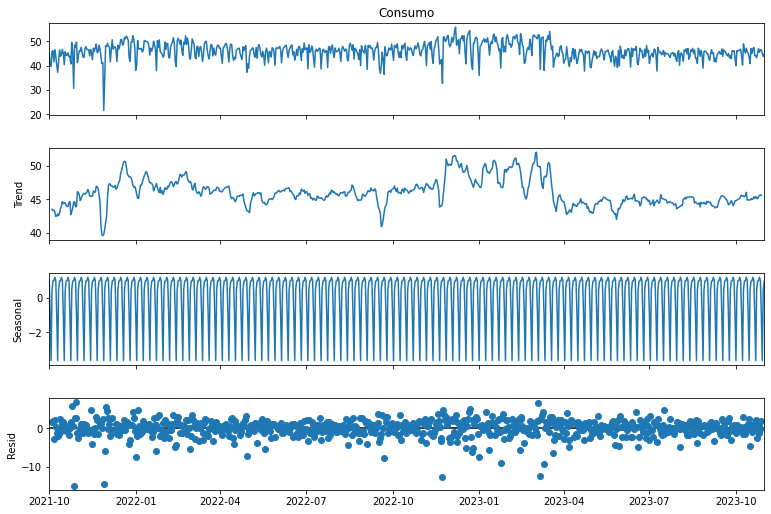

In [31]:
s_dec_additive = seasonal_decompose(df_consumo.Consumo, model = "adittive")
fig = s_dec_additive.plot()
fig.set_size_inches(12,8)
plt.show()

Se visualiza la tendencia de la serie.

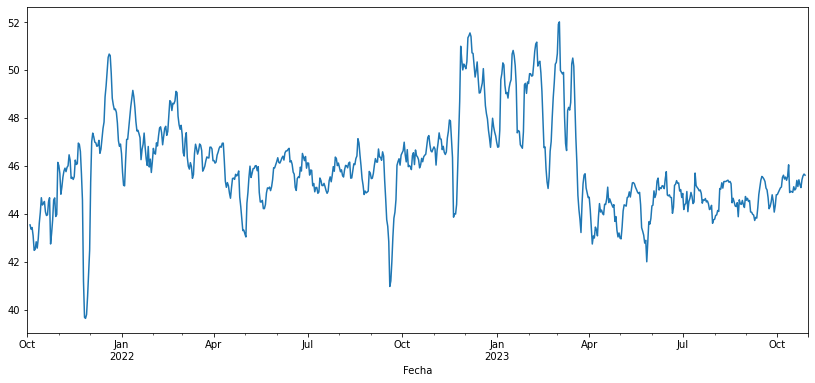

In [32]:
plt.figure( figsize = (14,6))
s:s_dec_additive.trend.plot()
plt.show()

La serie presenta estacionalidad, se verá a continuación.

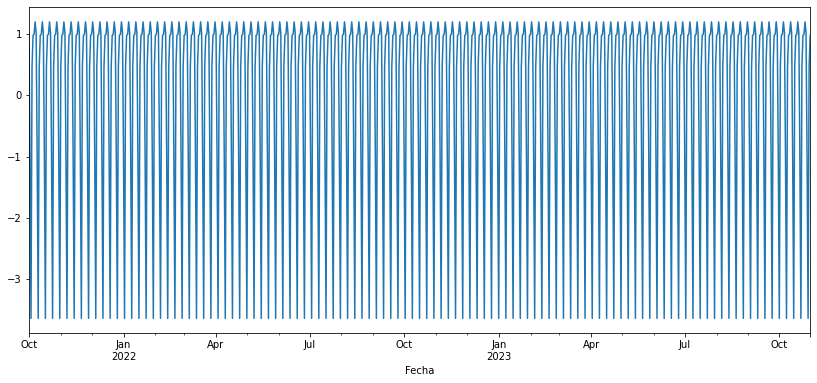

In [33]:
plt.figure( figsize = (14,6))
s_dec_additive.seasonal.plot()
plt.show()


Se visualizan los residuos.

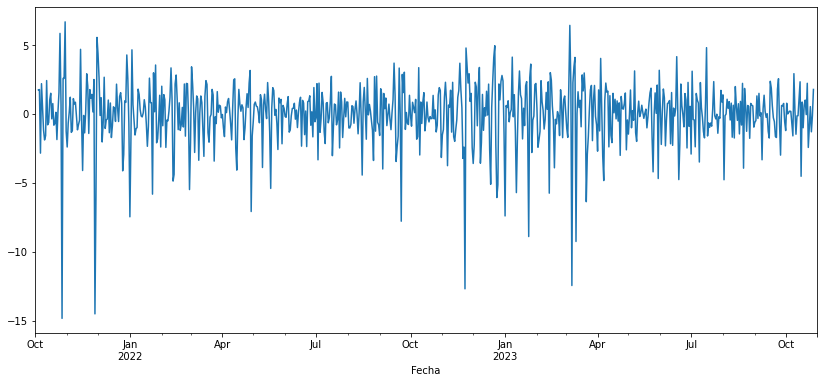

In [34]:
plt.figure( figsize = (14,6))
s_dec_additive.resid.plot()
plt.show()


In [35]:
print('Media de los residuos es',round(np.mean(s_dec_additive.resid), 4))

Media de los residuos es 0.0022


In [36]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
import statsmodels.api as sm

In [38]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [39]:
s_dec_additive.resid.describe()

count    755.000000
mean       0.002195
std        2.240277
min      -14.830995
25%       -0.985635
50%        0.220033
75%        1.291368
max        6.712733
Name: resid, dtype: float64

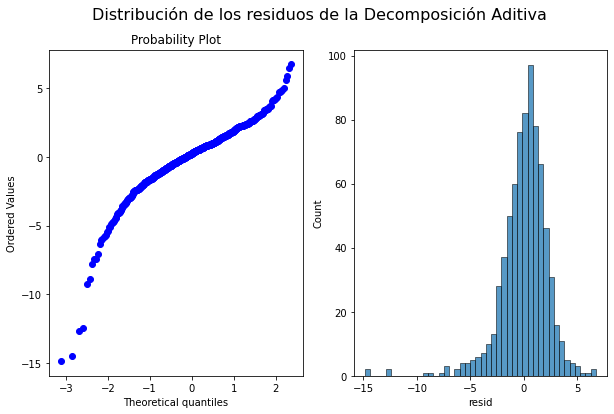

In [40]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Decomposición Aditiva", size = 16)


sns.histplot(data = s_dec_additive, x=s_dec_additive.resid, ax = axs[1]);
scipy.stats.probplot(s_dec_additive.resid, plot = axs[0], fit=True, dist='norm');

Algunas conclusiones obtenidas a partir de la descomposición aditiva de la serie.
- La variable Consumo no se distribuye normalmente
- Presenta una estacionalidad cada 7 períodos, una semana.
- Los residuos de la descomposición aditiva no se distribuyen de forma normal, aunque sí tienen media muy cercana a 0.

#### Descomposicion Multiplicativa

In [41]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

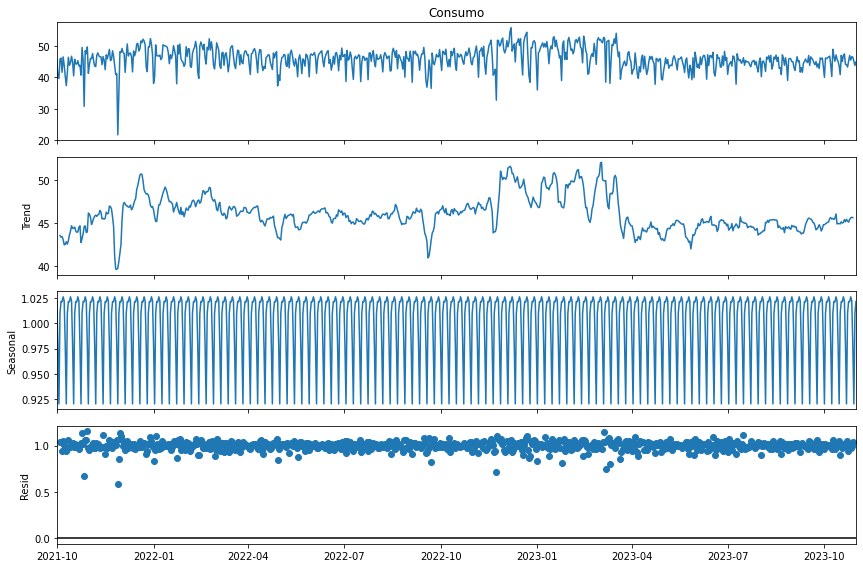

In [42]:
s_dec_multiplicative = seasonal_decompose(df_consumo.Consumo, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

A continuación se visualiza la tendencia

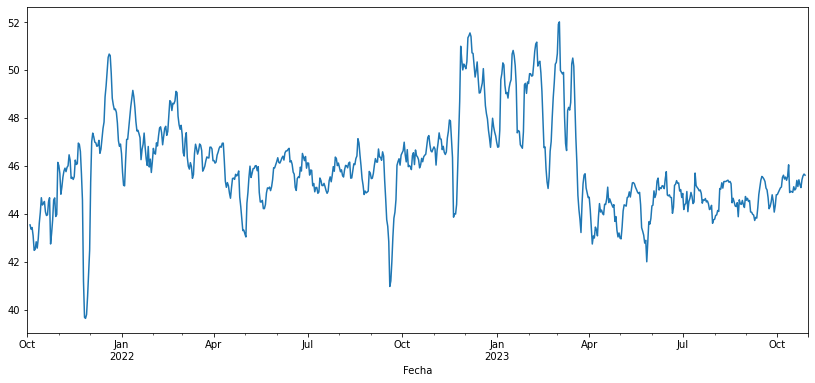

In [43]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.trend.plot()
plt.show()

Se visualiza a continuación la estacionalidad.

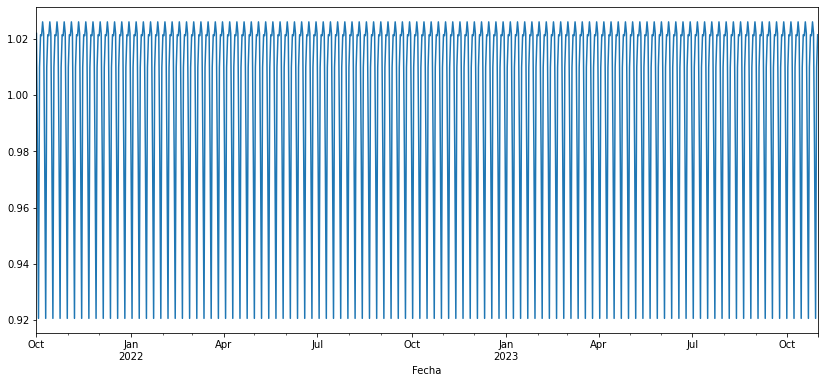

In [44]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.seasonal.plot()
plt.show()

Se visualizan los residuos del modelos.

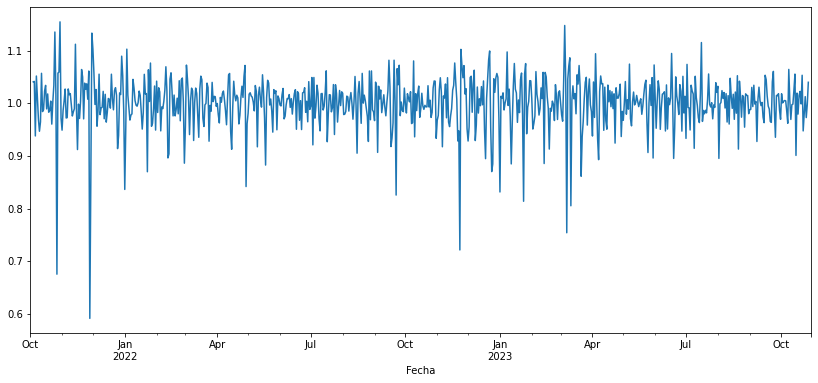

In [45]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.resid.plot()
plt.show()

In [46]:
s_dec_multiplicative.resid.describe()

count    755.000000
mean       0.999960
std        0.049896
min        0.591356
25%        0.979091
50%        1.004941
75%        1.026911
max        1.154617
Name: resid, dtype: float64

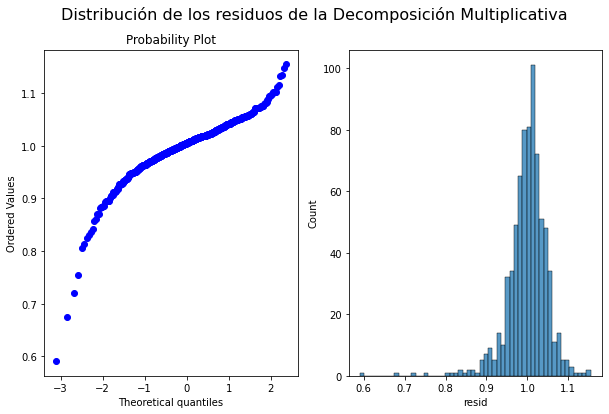

In [47]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Decomposición Multiplicativa", size = 16)


sns.histplot(data = s_dec_multiplicative, x=s_dec_multiplicative.resid, ax = axs[1]);
scipy.stats.probplot(s_dec_multiplicative.resid, plot = axs[0], fit=True, dist='norm');

Los residuos de la descomposición multiplicativa presentan una distribución con mayor asimetría que la descomposición aditiva y tienen media cercana a 1.

#### Representación gráfica de la Función de Autocorrelación

In [48]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [49]:
matplotlib.rcParams['figure.figsize']=[10.0,4.0]

Gráfico de Autocorrelaciones

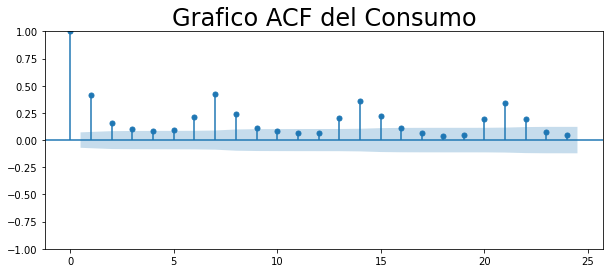

In [50]:
plot_acf(df_consumo.Consumo,lags=24)
plt.title("Grafico ACF del Consumo", size= 24)
plt.show()

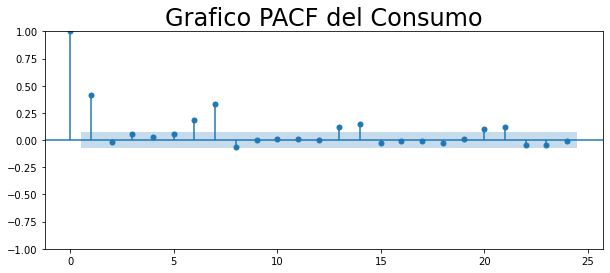

In [51]:
plot_pacf(df_consumo.Consumo,lags = 24)
plt.title("Grafico PACF del Consumo", size= 24)
plt.show()

In [52]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr_1serie(serie_r, nrol= 75 , titulo_1 = 'Serie: Consumo'):
  p1, axes=plt.subplots(3,1,figsize=(18,10),sharex=True, sharey=False )
  axes[2].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title=titulo_1)
  plot_pacf(serie_r, lags=nrol, ax= axes[1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')


  p1.legend()
  plt.show()

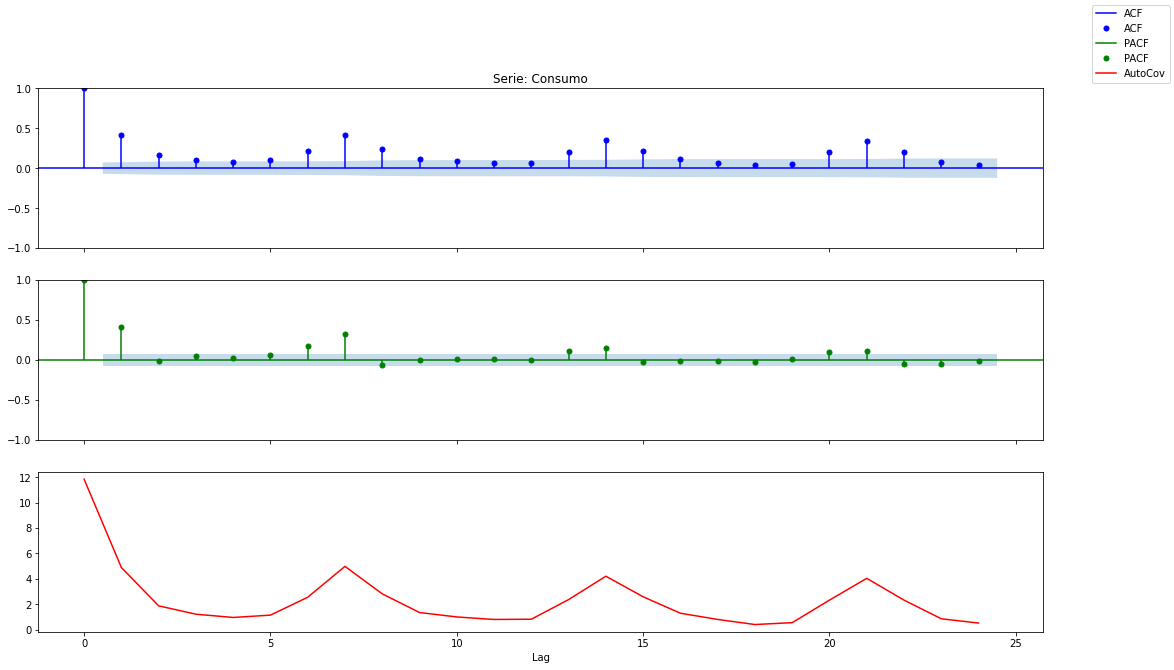

In [53]:
autocov_autocorr_1serie(df_consumo.Consumo,24)

Se puede ver que la serie es no estacionaria y que presenta estacionalidad. Se revisarán los test estadícos para confirmar.

In [54]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [55]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

In [56]:
estacionario(df_consumo.Consumo)

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [57]:
print_test_afd(df_consumo.Consumo)

Estadistico ADF: -2.981552
p-valor: 0.036653
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


Como la serie presenta una estacionalidad semanal, se realizará una diferenciación en 7 períodos.

#### Diferenciación en 7 períodos

In [58]:
df_consumo_diff_7 = df_consumo.copy()
df_consumo_diff_7 = df_consumo_diff_7 - df_consumo_diff_7.shift(7)
df_consumo_diff_7 = df_consumo_diff_7.dropna()
df_consumo_diff_7.head(10)

,Consumo
Fecha,
2021-10-08,-1.237808
2021-10-09,0.470850
2021-10-10,-2.363342
2021-10-11,-4.297323
2021-10-12,0.255757
2021-10-13,2.241446
2021-10-14,-1.849119
2021-10-15,2.767832
2021-10-16,4.535751


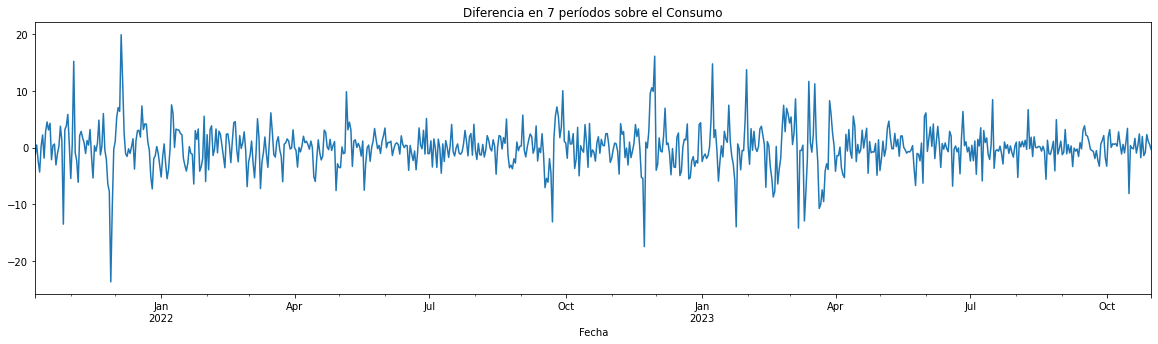

In [59]:
#grafico este indice con las diferencias aplicadas fila a fila
df_consumo_diff_7.Consumo.plot(figsize=(20,5), title = "Diferencia en 7 períodos sobre el Consumo")
plt.show()

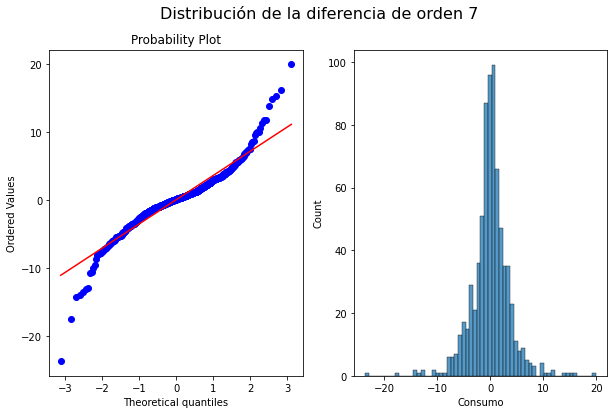

In [60]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de la diferencia de orden 7", size = 16)


sns.histplot(data = df_consumo_diff_7, x = 'Consumo', ax = axs[1]);
scipy.stats.probplot(df_consumo_diff_7.Consumo, plot = axs[0], fit=True, dist='norm');

La variable se distribuya de forma más simétrica pero con mayor varianza, esto se puede ver en las colas pesadas del QQ plot.
Se continúa con la descomposición de la serie.

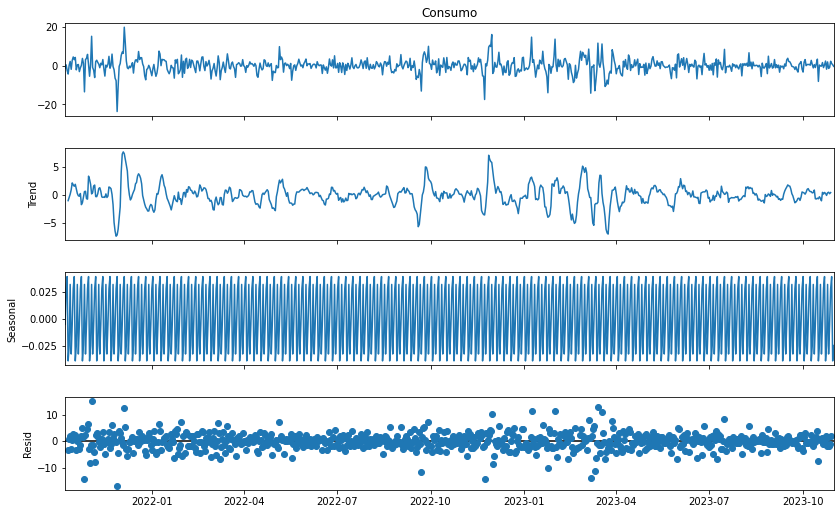

In [61]:
s_dec_additive_7 = seasonal_decompose(df_consumo_diff_7.Consumo, model = "adittive")
fig = s_dec_additive_7.plot()
fig.set_size_inches(12,8)
plt.show()

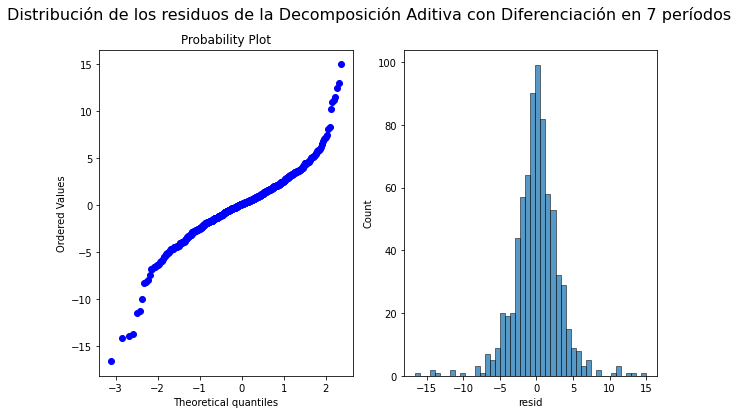

In [62]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Decomposición Aditiva con Diferenciación en 7 períodos", size = 16)


sns.histplot(data = s_dec_additive_7, x=s_dec_additive_7.resid, ax = axs[1]);
scipy.stats.probplot(s_dec_additive_7.resid, plot = axs[0], fit=True, dist='norm');

In [63]:
s_dec_additive_7.resid.describe()

count    748.000000
mean      -0.000538
std        3.100091
min      -16.602529
25%       -1.564229
50%        0.067207
75%        1.587085
max       14.950790
Name: resid, dtype: float64

La serie continúa presentando estacionalidad.
Los residuos de la descomposición aditiva tienen media 0 y des distribuyen simétricamente, aunque con una mayor varianza.
A continuación se analiza la descomposición de la serie con descomposición multiplicativa.

In [64]:
#s_dec_multiplicative_7 = seasonal_decompose(df_consumo_diff_7.Consumo, model = "multiplicative")
#s_dec_multiplicative_7.plot()
#plt.show()

Se realizarán los test estadísticos para determinar si la serie con la diferenciación en 7 períodos es estacionaria o no.

In [65]:
print_test_afd(df_consumo_diff_7.Consumo)

Estadistico ADF: -10.031623
p-valor: 0.000000
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


El test estadístico indica que la serie es estacionaria. Ahora veremos las gráficas AFS, AFC y PAFC.

In [66]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 , titulo_1 = 'Serie: Consumo', titulo_2 = 'Primera Derivada Consumo'):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title=titulo_1)
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title=titulo_2)
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

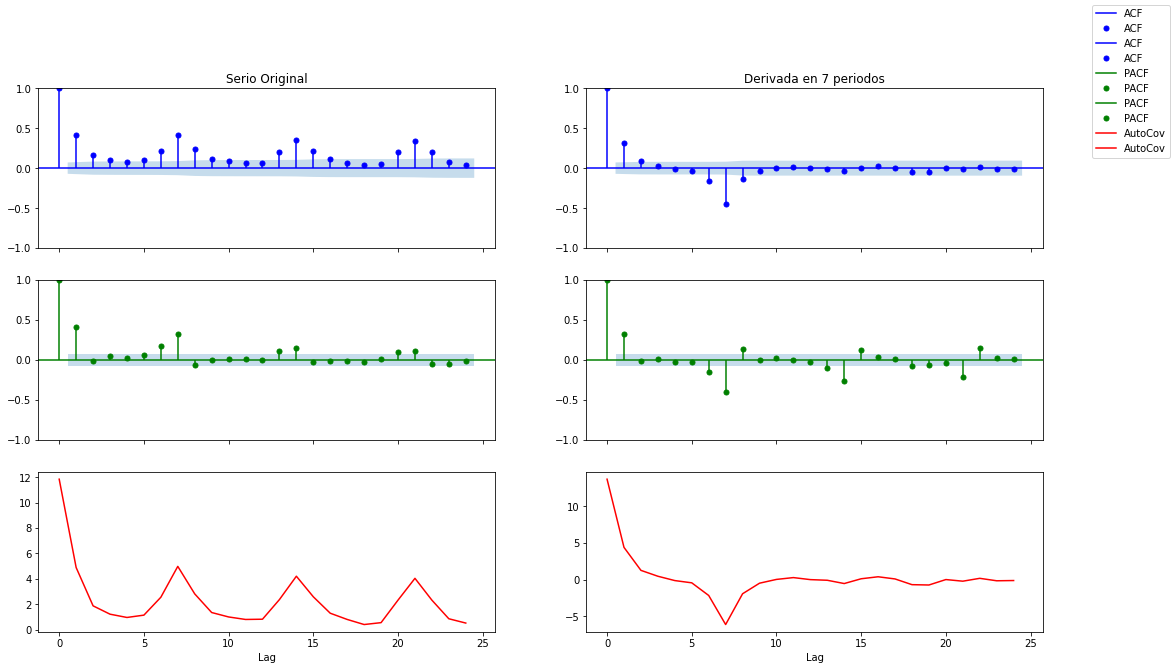

In [67]:
autocov_autocorr(df_consumo.Consumo,df_consumo_diff_7.Consumo,24 , "Serio Original", "Derivada en 7 periodos")

Se puede observar que el comportamiento de la serie con diferenciación de 7 períodos es mejor que la serie original. Se realizarán los test estadísticos para asegurarse la estacionariedad.

In [68]:
print_test_afd(df_consumo_diff_7.Consumo)

Estadistico ADF: -10.031623
p-valor: 0.000000
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


Según el test estadístico y el análisis de las gráficas AFS, AFC y PAFC, se llega a la conclusión que la serie con diferenciación de 7 períodos es estacionaria.

A continuación se harán 2 modelos con AutoARIMA, uno considerando la estacionalidad y otro sin estacionalidad y se compararán resultados.

## SARIMA

### AutoARIMA con estacionalidad

Se utilizará la serie con una diferenciación de orden 7.

In [69]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [95]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = df_consumo.Consumo.iloc[:round(len(df_consumo.Consumo)*.80)]

# Seleccionamos el 20% restante para test
test = df_consumo.Consumo.iloc[round(len(df_consumo.Consumo)*.80):]

cant_test = len(df_consumo.Consumo) - round(len(df_consumo.Consumo)*.80)

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train, test)

Fecha
2021-10-01    45.201497
2021-10-02    39.899719
2021-10-03    39.705724
2021-10-04    45.777167
2021-10-05    46.147136
                ...    
2023-05-28    39.239511
2023-05-29    46.262122
2023-05-30    39.894626
2023-05-31    48.007113
2023-06-01    45.936407
Freq: D, Name: Consumo, Length: 609, dtype: float64 Fecha
2023-06-02    43.199055
2023-06-03    44.204110
2023-06-04    42.891846
2023-06-05    46.488384
2023-06-06    44.061988
                ...    
2023-10-27    46.582215
2023-10-28    46.426496
2023-10-29    45.175833
2023-10-30    43.797751
2023-10-31    44.892422
Freq: D, Name: Consumo, Length: 152, dtype: float64


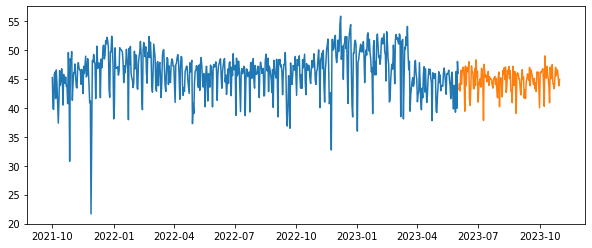

In [96]:
# Visualización Train - Test

plt.plot(train)
plt.plot(test)

In [100]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

auto_arima(train, start_p=0, max_p=10, start_d=0, max_d=10, start_q=0, max_q=10,
           start_P=0, max_P=10, start_D=0, max_D=10, start_Q=0, max_Q=10,
           seasonal=True, m=52, trace=True, stepwise=True, maxiter = 100).summary()
#

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3397.562, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3350.889, Time=3.20 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3220.820, Time=6.78 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3395.563, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=3228.655, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=3215.549, Time=6.29 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3218.765, Time=4.10 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=3214.102, Time=90.84 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=3212.590, Time=58.08 sec
 ARIMA(0,1,1)(3,0,0)[52] intercept   : AIC=3213.162, Time=119.11 sec
 ARIMA(0,1,1)(3,0,1)[52] intercept   : AIC=3213.563, Time=175.06 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=3397.062, Time=24.16 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=3169.357, Time=69.21 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=3171.777, Time=6.09 sec
 ARIMA(1,1,

KeyboardInterrupt: 

In [98]:
modelo_sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,10,7))
modelo_sarima = modelo_sarima.fit()
print(modelo_sarima.summary())

                                                    SARIMAX Results                                                    
Dep. Variable:                                                         Consumo   No. Observations:                  609
Model:             SARIMAX(1, 1, 1)x(0, 0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 7)   Log Likelihood               -1514.890
Date:                                                         Thu, 30 Nov 2023   AIC                           3055.780
Time:                                                                 21:14:47   BIC                           3113.113
Sample:                                                             10-01-2021   HQIC                          3078.085
                                                                  - 06-01-2023                                         
Covariance Type:                                                           opg                                         
                 coef    std err        

In [93]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Consumo"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [79]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

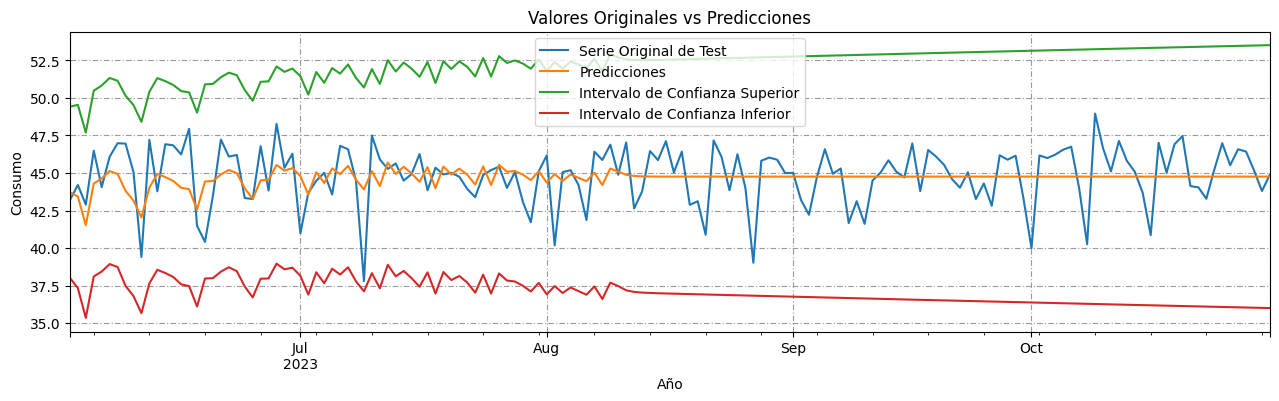

In [99]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 15 días del test
predicciones_sarima = modelo_sarima.get_forecast(cant_test)

# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test, predicciones_sarima.predicted_mean, predicciones_sarima.conf_int())

In [ ]:
error_relativo_sarima = (test[:cant_test] - predicciones_sarima.predicted_mean) / test[:cant_test]
# Se retiran de los errores de los valores nulos en serie original.
# Estos valores son imposibles de predecir.
#error_relativo_sarima = error_relativo_sarima[error_relativo_sarima >-40]*100

In [ ]:
error_relativo_sarima.plot()

In [ ]:
print('La media del error relativo es =',round(np.mean(error_relativo_sarima),2),'%')
print('El valor máximo del error relativo es =',round(np.max(error_relativo_sarima),2),'%')
print('El valor mínimo del error relativo es =',round(np.min(error_relativo_sarima),2),'%')

In [ ]:
#Evaluamos las métricas del modelo
evaluar_metricas(test[:150], predicciones_sarima.predicted_mean )

----------------------------------------

In [ ]:
primera_diffs=df_consumo.Consumo.values[1:]-df_consumo.Consumo.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [ ]:
df_consumo['primera_diffs_Consumo']=primera_diffs

In [ ]:
df_consumo.head()

In [ ]:
#grafico este indice con las diferencias aplicadas fila a fila
df_consumo.primera_diffs_Consumo.plot(figsize=(20,5), title = "Primera diferencia sobre el Consumo")
plt.show()

In [ ]:
df_consumo.primera_diffs_Consumo.describe()

In [ ]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle("Distribución de los residuos de la Decomposición Multiplicativa", size = 16)


sns.histplot(data = df_consumo, x = 'primera_diffs_Consumo', ax = axs[1]);
scipy.stats.probplot(df_consumo.primera_diffs_Consumo, plot = axs[0], fit=True, dist='norm');

La primera derivada parece tener una distribución más similar a una distribución normal que la serie original.

In [ ]:
plot_acf(df_consumo.primera_diffs_Consumo,lags=24)
plt.title("Grafico ACF de primera diferencia sobre el Consumo", size= 24)
plt.show()

In [ ]:
plot_pacf(df_consumo.primera_diffs_Consumo,lags=24)
plt.title("Grafico PACF de primera diferencia sobre el Consumo", size= 24)
plt.show()

Se comparán los gráficos de la autocorrelación para ambas series.

In [ ]:
autocov_autocorr(df_consumo.Consumo,df_consumo.primera_diffs_Consumo ,24)

### Gráfico de Autocovarianza

In [ ]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = df_consumo.Consumo

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars)
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza')
plt.show()

In [ ]:
plot_pacf(df_consumo.Consumo);

El consumo se comporta como un random walk, por lo que se modelizará como un AR(1).

Diferenciación estacional por 12 períodos de la serie

In [ ]:
autocov_autocorr(df_consumo.Consumo,df_consumo_diff_7.Consumo.dropna(),24 , "Serio Original", "Derivada en 7 periodos")

Ahora se compara la primera derivada con la derivada de 7 períodos.

In [ ]:
autocov_autocorr(df_consumo.primera_diffs_Consumo,df_consumo_diff_7.Consumo, 24, "Primera Derivada", "Diferencia en 7 periodos")

Transformación Box Cox

In [ ]:
df_consumo_BoxCox = df_consumo.copy()
transformacion_Box_Cox = np.asarray(df_consumo_BoxCox['Consumo'].values)

In [ ]:
fitted_data, fitted_lambda = stats.boxcox(transformacion_Box_Cox)

In [ ]:
# creando ejes para dibujar
fig, ax = plt.subplots(1, 2)

# grafico de serie original (non-normal) y fitted data (normal)
sns.distplot(transformacion_Box_Cox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

# agregando leyendas a las subtramas
plt.legend(loc = "upper right")

# reescalando las subtramas
fig.set_figheight(5)
fig.set_figwidth(10)

In [ ]:
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [ ]:
df_consumo_BoxCox=pd.DataFrame(fitted_data, columns=['Consumo'])

In [ ]:
autocov_autocorr(df_consumo.Consumo,df_consumo_BoxCox.Consumo ,24, "Serie original", "Box Cox")

## Analisis de estacionariedad de la serie

Serie original

In [ ]:
print_test_afd(df_consumo.Consumo)

In [ ]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(df_consumo.Consumo, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(df_consumo.Consumo, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

In [ ]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(df_consumo.Consumo, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

Salvo en el test donde no se incluye la componente lineal ni término lineal, en todos los otros test el pvalor es menor a 0,05.

In [ ]:
plot_acf(df_consumo.Consumo,lags=24);
plot_pacf(df_consumo.Consumo,lags=24);

In [ ]:
estacionario(df_consumo.Consumo)

Solo 1 de los 4 test realizados indica que debe diferenciarse la serie.

Phillips-Perron

In [ ]:
#!pip install arch
from arch.unitroot import PhillipsPerron

In [ ]:
def Phillips_Perron(series, **k):

    params = {'n':'No incluye término independiente ni lineal',
              'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [ ]:
Phillips_Perron(df_consumo.Consumo)

Se el test de Phillips Perron, incluyendo ambos términos, la serie es estacionaria y no necesita de diferenciación.

KPSS

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [ ]:
kpss_test(df_consumo.Consumo)

En el test KPSS indica que se debe aplicar 1 diferenciación y que la serie es estacionaria.

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [ ]:
# Dicky Fuller Serie original
Augmented_Dickey_Fuller_Test_func(df_consumo.Consumo,'Consumo')

## ARIMA

In [ ]:
model = sm.tsa.arima.ARIMA(df_consumo.Consumo, order=((1),0,0))
result = model.fit()

In [ ]:
result.summary()

In [ ]:
result.arroots

In [ ]:
print(f"La raiz REAL del modelo condicionado a un AR(1)  es= {result.arroots} \n vemos que es en modulo mayor a 1. Es decir, es estacionaria ")

In [ ]:
print(f"Los parametros que arroja el modelo son= \n {result.params} ")

In [ ]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {result.aic} \n -Bayesiano= {result.bic} \n -Hannan-Quinn {result.hqic}")

In [ ]:
print(f" La media de los residuos del modelo es=  {result.resid.mean()}")

In [ ]:
print(f" La varianza de los residuos del modelo es=  {result.resid.var()}")

La media de los residuos se encuentra muy cercana a 0, aunque los residuos presentan una gran varianza.

In [ ]:
result.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

Se analiza si los residuos se comportan como ruido blanco.

In [ ]:
sns.distplot(result.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

In [ ]:
scipy.stats.probplot(result.resid, plot = pylab)
plt.title("QQ Plot residuos del modelo", size = 24)
pylab.show()

En el QQ plot se puede ver la gran asimetría hacia la izquierda que tienen los residuos del modelo. Esto se debe a que en algunos días de la serie no se cargaron combustible y por lo tanto el consumo fue 0. Estos puntos exógenos no pueden ser predichos por el modelo y genera que los residuos sean muy grandes.

### Prueba Ljung-Box

In [ ]:
import statsmodels.api as sm

In [ ]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(result.resid, lags=30)

In [ ]:
Incorr_residuos_modelo

In [ ]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo")
plt.ylabel("P-valores ")

Presentan correlación los residuos??

## AutoARIMA

## SARIMA

In [ ]:
# Pruebo el autoarima sin estacionalidad ( " seasonal = False ")
auto_arima(train, start_p=0, max_p=7, start_d=0, max_d=7, start_q=0, max_q=7,
           start_P=0, max_P=7, start_D=0, max_D=7, start_Q=0, max_Q=7,
           seasonal=False, trace=True, stepwise=True).summary()

In [ ]:
modelo_arima = sm.tsa.arima.ARIMA(train, order=(2,1,1), seasonal_order=(0, 0, 0, 0))
modelo_arima = modelo_arima.fit()

modelo_arima.summary()

In [ ]:
predicciones_arima = modelo_arima.get_forecast(len(test))

In [ ]:
predicciones_arima = modelo_arima.get_forecast(150)

graficar_pred(test[:150], predicciones_arima.predicted_mean, predicciones_arima.conf_int())

In [ ]:
evaluar_metricas(test[:150], predicciones_arima.predicted_mean)

In [ ]:
error_relativo_arima = (test[:150] - predicciones_arima.predicted_mean) / test[:150]
# Se retiran de los errores de los valores nulos en serie original.
# Estos valores son imposibles de predecir.
#error_relativo_arima = error_relativo_arima[error_relativo_arima >-40]*100

In [ ]:
error_relativo_arima.plot()

In [ ]:
print('La media del error relativo es =',round(np.mean(error_relativo_arima),2),'%')
print('El valor máximo del error relativo es =',round(np.max(error_relativo_arima),2),'%')
print('El valor mínimo del error relativo es =',round(np.min(error_relativo_arima),2),'%')

In [ ]:
test[:150].plot(label="Serie Original de Test")
predicciones_arima.predicted_mean.plot(label="Predicciones ARIMA")
predicciones_sarima.predicted_mean.plot(label="Predicciones SARIMA")
plt.legend()

In [ ]:
datos = {'Modelos': ['SARIMA','ARIMA'],
         'AIC': [modelo_sarima.aic, modelo_arima.aic],
         'BIC': [modelo_sarima.bic, modelo_arima.bic],
         'MAE': [modelo_sarima.mae, modelo_arima.mae],
         'MSE': [modelo_sarima.mse, modelo_arima.mse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

El modelo SARIMA presenta mejores resultados que el ARIMA.

Modelo sarima de la diferencia.

In [ ]:
errores_arima = predicciones_arima.predicted_mean - test[:150]
errores_sarima = predicciones_sarima.predicted_mean - test[:150]
mean_errores_arima = np.mean(errores_arima)
mean_errores_sarima = np.mean(errores_sarima)
print("La media de los errores del modelo SARIMA =", round(mean_errores_sarima, 2))
print("La media de los errores del modelo ARIMA =", round(mean_errores_arima, 2))

In [ ]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de los residuos', fontsize = 20)

sns.histplot(data = errores_arima, ax = axs[0]).set(title='ARIMA')
sns.histplot(data = errores_sarima, ax = axs[1]).set(title='SARIMA')

In [ ]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de los residuos', fontsize = 20)

scipy.stats.probplot(errores_arima, plot = axs[0]);
scipy.stats.probplot(errores_sarima, plot = axs[1]);
axs[0].set_title("ARIMA");
axs[1].set_title("SARIMA");

Método de Holt winters exponential smoothing

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
#Divido la serie de tiempo en entrenamiento y testeo
train_len = round(len(df_consumo.Consumo)*0.8)
train = df_consumo.iloc[0:train_len] # Primeros 134 meses para entrenamiento
test = df_consumo.iloc[train_len:] # Ultimos 12 meses para testeo

In [ ]:
# Entreno el modelo
largo = len(df_consumo.Consumo) - train_len
fitted_model = ExponentialSmoothing(train['Consumo'],trend="mul",seasonal="mul",seasonal_periods=largo).fit()
test_predictions = fitted_model.forecast(largo)

In [ ]:
prediccion=[]

for dia in range(0,largo):
  prediccion.append(test_predictions[dia])

In [ ]:
print(prediccion)

In [ ]:
test['prediccion'] = np.array(prediccion)

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Consumo'], label='Train')
plt.plot(test['Consumo'], label='Test')
plt.plot(test['prediccion'], label='Prediccion')
plt.legend(loc='best')
plt.title('Holt winters exponential smoothing')
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
model = ExponentialSmoothing(train['Consumo'],trend="mul",seasonal='mul', seasonal_periods=largo).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])
MSE=round(mean_squared_error(test['Consumo'], pred),2)
MSE

In [ ]:
# Validación Cruzada de Series de Tiempo ( Sin dejar brecha )
train_sets = []
valid_sets = []

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)   #,gap=2)
for train_index, test_index in tscv.split(df_consumo.Consumo):
  print('TRAIN:', train_index, 'TEST:', test_index)
  X_train, X_test = df_consumo.Consumo[train_index], df_consumo.Consumo[test_index]

  train_sets.append(X_train)
  valid_sets.append(X_test)

In [ ]:
model1 = ExponentialSmoothing(train_sets[0],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred1 = model1.predict(start=valid_sets[0].index[0], end=valid_sets[0].index[-1])
MSE1=round(mean_squared_error(valid_sets[0], pred1),2)

model2 = ExponentialSmoothing(train_sets[1],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred2 = model2.predict(start=valid_sets[1].index[0], end=valid_sets[1].index[-1])
MSE2=round(mean_squared_error(valid_sets[1], pred2),2)

model3 = ExponentialSmoothing(train_sets[2],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred3 = model3.predict(start=valid_sets[2].index[0], end=valid_sets[2].index[-1])
MSE3=round(mean_squared_error(valid_sets[2], pred3),2)

model4 = ExponentialSmoothing(train_sets[3],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred4 = model4.predict(start=valid_sets[3].index[0], end=valid_sets[3].index[-1])
MSE4=round(mean_squared_error(valid_sets[2], pred4),2)

model5 = ExponentialSmoothing(train_sets[4],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred5 = model5.predict(start=valid_sets[4].index[0], end=valid_sets[4].index[-1])
MSE5=round(mean_squared_error(valid_sets[4], pred5),2)

In [ ]:
print ("MSE:", MSE)
print ("MSE1:", MSE1)
print ("MSE2:", MSE2)
print ("MSE3:", MSE3)
print ("MSE4:", MSE4)
print ("MSE5:", MSE5)

In [ ]:
Overall_MSE=round((MSE1+MSE2+MSE3+MSE4+MSE5)/5,2)
print ("Promedio general MSE:", Overall_MSE)

In [ ]:
# Validación Cruzada de Series de Tiempo ( Dejando brecha )
train_sets = []
valid_sets = []

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5 ,gap=2)
for train_index, test_index in tscv.split(df_consumo.Consumo):
  print('TRAIN:', train_index, 'TEST:', test_index)
  X_train, X_test = df_consumo.Consumo[train_index], df_consumo.Consumo[test_index]

  train_sets.append(X_train)
  valid_sets.append(X_test)

In [ ]:
model1 = ExponentialSmoothing(train_sets[0],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred1 = model1.predict(start=valid_sets[0].index[0], end=valid_sets[0].index[-1])
MSE1=round(mean_squared_error(valid_sets[0], pred1),2)

model2 = ExponentialSmoothing(train_sets[1],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred2 = model2.predict(start=valid_sets[1].index[0], end=valid_sets[1].index[-1])
MSE2=round(mean_squared_error(valid_sets[1], pred2),2)

model3 = ExponentialSmoothing(train_sets[2],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred3 = model3.predict(start=valid_sets[2].index[0], end=valid_sets[2].index[-1])
MSE3=round(mean_squared_error(valid_sets[2], pred3),2)

model4 = ExponentialSmoothing(train_sets[3],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred4 = model4.predict(start=valid_sets[3].index[0], end=valid_sets[3].index[-1])
MSE4=round(mean_squared_error(valid_sets[2], pred4),2)

model5 = ExponentialSmoothing(train_sets[4],trend="mul", seasonal='mul', seasonal_periods=7).fit()
pred5 = model5.predict(start=valid_sets[4].index[0], end=valid_sets[4].index[-1])
MSE5=round(mean_squared_error(valid_sets[4], pred5),2)

In [ ]:
print ("MSE:", MSE)
print ("MSE1:", MSE1)
print ("MSE2:", MSE2)
print ("MSE3:", MSE3)
print ("MSE4:", MSE4)
print ("MSE5:", MSE5)

In [ ]:
Overall_MSE=round((MSE1+MSE2+MSE3+MSE4+MSE5)/5,2)
print ("Promedio general MSE:", Overall_MSE)